# Analysis of the Alcohol Drinking in UCI Student

Author: Jingxi.Feng (30294115)

Course Project, UC Irvine, Math 10, S22

## Introduction

Introduce your project here.  Maybe 3 sentences.

<font color=red> The dataset that I am using is actually realistic data from my another current class: Stastic 7. In that class, we learn about method of different kind of stastic testing and concluding any hypothesis base on the test result. The overlapping knowledge between stastic class and math 10 lead me to wonder if I would apply my knowledge from Math 10 to Stastic 7. In general, this dataset come from my project of creating survey and getting test statstic. My purpose of the Stastic 7 project is meant to find out drinking motivation, drinking frequence amount the studnet in UCI. In the help of the professor, I successfully collect 314 students information and prepare to conduct my hypothesis using Math 10 sills. 

In the end, I will also introduce an extra dataset from Duke Univesity in order to do comparison.

## Main portion of the project

Section 1: General Look of the Dataset

Section 2: Drinking level

Section 3: Descriptive Statistics in Drinking level

Section 4: Drinking Frequence

Section 5: Inferential statistics in Drinking Frequency

Section 6: Interesting of predicting data in other college

<font color=blue> <font size=6> Section 1: General Look Of the Dataset

<font color=brown> <font size=3> In here, I convey the dataset from JMP into excel, and use the code to call the excel dataset into pandas


In [ ]:
import pandas as pd 
import altair as alt 
import pandas as pd 
!pip install openpyxl
df=pd.read_excel("Stastic Data for Project.xlsx",na_values="nan")
df

     |████████████████████████████████| 242 kB 9.4 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


,Do you have a clear understanding of what is alcoholic drinking?,Have you experienced alcoholic drinking?,"Please select all the factors that applied to your reasons for alcolchol drinking. (if the you can not find your reason below, please fill out the blank in Other)","If you responded ""Other"" to the previous question, put your answer here. Otherwise, type NA.",What is your usual drinking level?,What's your drinking frequency (per week)?,What gender do you most identify as?,"How old will you be at December 31, 2022 (After your birthday this year)?",What is your current year at UCI?,GPA,Mood
0,Confident,No,NaN,NaN,NaN,Never,Female,19.0,First year,3.28,NaN
1,Confident,Yes,Addiction to Acholoc,NaN,Moderate (tiny dizzy),1-2 times,Male,23.0,Second year,3.10,NaN
2,Very confident,Yes,"Release stress from school works,Socailizing w...",NaN,Mild,Never,Female,20.0,Second year,3.40,NaN
3,Confident,Yes,Socailizing with peers,NaN,Mild,1-2 times,Male,20.0,First year,3.68,NaN
4,Confident,Yes,Having fun,na,Mild,1-2 times,Female,20.0,Fourth year,3.60,NaN
...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=brown> <font size=3> We see that there are some of missing datas and bad datas cause by non-response bias and reponse bias. We might not 100 percent drop all the missing value since the datasample is small. 

Also,in order to have a easier operation on the dataset, we need to "normalize" the dataframe. We want the column name to be shorter (since the column name is correspond to each survey questions)

In [ ]:
df.rename({"Do you have a clear understanding of what is alcoholic drinking?":"understanding"},axis=1,inplace=True)
df.rename({"Have you experienced alcoholic drinking?":"experience"},axis=1,inplace=True)
df.rename({"Please select all the factors that applied to your reasons for alcolchol drinking. (if the you can not find your reason below, please fill out the blank in Other)":"reason"},axis=1,inplace=True)
df.rename({"If you responded 'Other' to the previous question, put your answer here. Otherwise, type NA.":"Otherreason"},axis=1,inplace=True)
df.rename({"What is your usual drinking level?":"level"},axis=1,inplace=True)
df.rename({"What's your drinking frequency (per week)?":"Freq"},axis=1,inplace=True)
df.rename({"What gender do you most identify as?":"gender"},axis=1,inplace=True)
df.rename({"How old will you be at December 31, 2022 (After your birthday this year)?":"Year"},axis=1,inplace=True)
df.rename({"What is your current year at UCI?":"grade"},axis=1,inplace=True)

<font color=brown> <font size=3> However, I want to drop some of the nan values. Seeing columns "Other", which contians much of nan values (since the much participants does not have other reason for drinking alcohol). Before I drop the actually nan values, I need drop this columns first. 

In [ ]:
df.drop('If you responded "Other" to the previous question, put your answer here. Otherwise, type NA.',axis=1,inplace=True)

In [ ]:
df=df.dropna()

<font color=blue> <font size=6> Section 2: Drinking Level

<font color=brown> <font size=3> In here, I want to see the relation between Drinking level and student's grade. Before that, I need unit the participants' answers into same grading way. For example, there are answer for first year, meanwhile, there are answer for sophomore. So I would likely to change all sophomore grade into first year grade.

In [ ]:
df["grade"].value_counts()

First year             82
Freshman               54
Second year            48
Sophomore              28
Third year             18
Fourth year            10
Junior                  7
Fifth year or later     2
Graduate Student        1
Senior                  1
Name: grade, dtype: int64

In [ ]:
for i in df["grade"]:
    if i=="Freshman":
        df["grade"].replace({i:"First year"},inplace=True)
    if i=="Sophomore":
        df["grade"].replace({i:"Second year"},inplace=True)
    if i=="Junior":
        df["grade"].replace({i:"Third year"},inplace=True)
    if i=="Senior":
        df["grade"].replace({i:"Third year"},inplace=True)


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


<font color=brown> <font size=3> I set df2 as copy of df, so that I could operate more pandas operation without change the orginal dataframe. 

In [ ]:
df2=df.copy()

<font color=brown> <font size=3> I would to see the numbers counts of each drinking level, so I set columns "Moderate","Mild",and "Over drinking" to present the number of each cases.

In [ ]:

df2["Moderate"]=0
df2["Mild"]=0
df2["Over drinking"]=0

df2.loc[df["level"]=="Moderate (tiny dizzy)","Moderate"]=1
df2.loc[df["level"]=="Mild","Mild"]=1
df2.loc[df["level"]=="Over drinking (e.g. Losing consciousness）","Over drinking"]=1

<font color=brown> <font size=3> In here, I want to see how does the drinking level relate with grade. I want to show and compare the mean (which is the proportion of each grade on each cases) of level, because by grade distribution in the survey is not likely to be equal. Comparing proportion would be more meaningful than sum of cases. By having the visualize method, I also set up the color =counts to show first year and second year students are majority groups in my data, since they have deeper color as they have more counts. 

In [ ]:
cols=["Mild","Moderate","Over drinking"]
chart_list=[]
for i in cols:
    c=alt.Chart(df2).mark_bar().encode(
        x="grade",
        y=f"mean({i})",
        color="count()"
    )
    chart_list.append(c)
alt.hconcat(*chart_list)

alt.HConcatChart(...)

<font color=brown> <font size=3> I also want to see whether there is confounding variables (variables other than we concerns).Hence I present bar graph of gender and level. (In other words, I concern about gender might affect we draw out the conclusion). In the graph, below, we find out there are more female students in each cases, but it just implied more female students sample in my data. 

In [ ]:
chart_list2=[]
for i in cols:
    c=alt.Chart(df2).mark_bar().encode(
        x="gender",
        y=f"sum({i})",
        color="count()"
    )
    chart_list2.append(c)
alt.hconcat(*chart_list2)

alt.HConcatChart(...)

In [ ]:
df2

,understanding,experience,reason,level,Freq,gender,Year,grade,GPA,Mood,Moderate,Mild,Over drinking
27,Very confident,Yes,"Release stress from school works,Socailizing w...",Mild,Never,Female,19.0,First year,2.500,7.0,0,1,0
28,Confident,No,Other,Mild,Never,Female,20.0,Second year,3.400,5.0,0,1,0
29,Confident,No,"Release stress from school works,Release emoti...",Mild,Never,Female,20.0,Second year,3.600,6.0,0,1,0
30,Confident,No,Release emotion from relationship,Moderate (tiny dizzy),1-2 times,Male,21.0,Second year,3.000,5.0,1,0,0
31,Very confident,Yes,"Socailizing with peers,Having fun",Mild,1-2 times,Female,20.0,Second year,3.339,10.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Very confident,Yes,"Socailizing with peers,Having fun",Moderate (tiny dizzy),1-2 times,Female,19.0,First year,3.914,5.0,1,0,0
308,Confident,No,Other,Mild,Never,Female,20.0,Second year,3.694,1.0,0,1,0
309,Very confident,Yes,"Release stress from school works,Socailizing w...",Moderate (tiny dizzy),Never,Female,20.0,Second year,3.800,10.0,1,0,0
311,Very confident,Yes,"Socailizing with peers,Having fun",Moderate (tiny dizzy),1-2 times,Male,21.0,First year,3.000,8.0,1,0,0


<font color=brown> <font size=3> After, I see the graphs, I am interesting using grade and gender to predict one's drinking level. In here, I start to setting up the numercial counts for each variables. This help me to prepare to use the machine learning of logistic regression. 

In [ ]:
for i in df2["gender"].unique():
    df2[i]=0
    df2.loc[df2["gender"]==i,i]=1

for i in df2["grade"].unique():
    df2[i]=0
    df2.loc[df2["grade"]==i,i]=1
 
genderandgrade=[i for i in df2["gender"].unique()]+[i for i in df2["grade"].unique()]

<font color=brown> <font size=3> I also split up train and test groups to see if fitting model accurate on the test groups or not. Seeing the result of clf.score of 0.5298, I suppose it does not have a very accurate prediction on the test group. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(df2[genderandgrade],df2["level"],train_size=0.4)
clf=LogisticRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.5695364238410596

<font color=brown> <font size=3> I set up a Dataframe to contian all of my features. I put "Male" columns and "Second year" columns as 1, other as 0 , indicating I am a second grade male students. The following out is my drinking level, which is surprise me because to meet my drinking level


In [ ]:

## Provide a example of me to try on 
JingxiFeng=pd.DataFrame({"Male":[1],"Female":[0],"Prefer not to say":[0],"Non-binary/Non-conforming":[0],"Genderqueer":[0],"Second year":[0],"First year":[1],"Fourth year":[0],"Fifth year or later":[0],"Third year":[0],"Graduate Student":[0]})
a=clf.predict(JingxiFeng[genderandgrade])
print(a)


['Mild']


<font color=blue> <font size=6> Section 3: Descriptive Statistics in Drinking level

<font color=brown> <font size=3> Having seeing both graphs and machine learning, I am interesting in setting up a hypothesis such that grade is association with drinking level. Hence, I am importing chi square table in order to check the association between Moderate drinking and grade.

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns 
import matplotlib.pyplot as plt

<font color=brown> <font size=3> The belowing is the DataFrame version of the chi-square table. 

In [ ]:
Chi_square_table= pd.crosstab(df2['grade'], df2['Moderate']) 
Chi_square_table.drop(index=["Fifth year or later","Graduate Student"],inplace=True)
Chi_square_table.rename({0:"Not Moderate",1:"Is Moderate"},axis=1)

Moderate,Not Moderate,Is Moderate
grade,,
First year,85,51
Fourth year,5,5
Second year,41,35
Third year,15,11


<font color=brown> <font size=3> The below is the visual version of the Chi-square table. Seeing the data, I would have general guess that grade does not have strong association with Moderate level of drinking, because each data in the blank are close to the expect value (value that close to distribution if there is no relationship)

<AxesSubplot:xlabel='Moderate', ylabel='grade'>

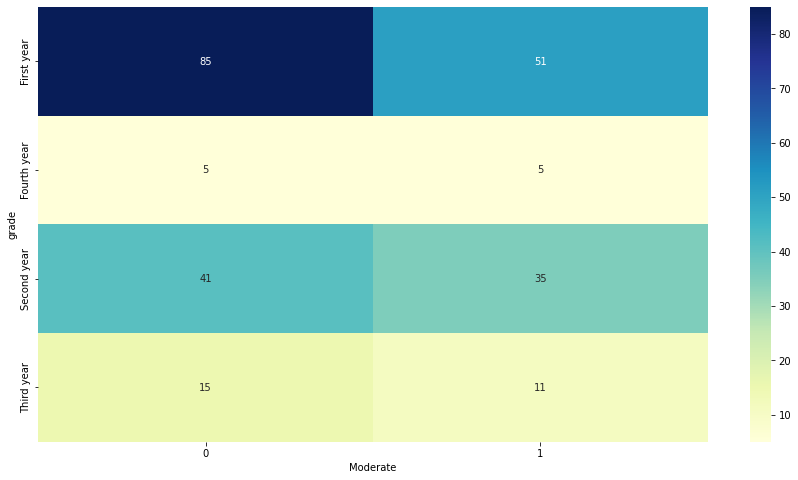

In [ ]:
plt.figure(figsize=(15,8)) 
sns.heatmap(Chi_square_table, annot=True, cmap="YlGnBu")

<font color=brown> <font size=3> The below are the test-stastistic and p-value. I have set up a significant level of 0.05, and seeing that the p-value far above this significant level, I conclude that there is no sufficant evidence show Grade is strongly associate with drinking level in this stastic Class samples. 

In [ ]:
test_statistic, pvalue, dof, expected = chi2_contingency(Chi_square_table)
test_statistic=test_statistic.round(3)
pvalue=pvalue.round(3)
f"the test stastistic is {test_statistic}, and the P-value is {pvalue} which is higher than the significant level of 0.05"

'the test stastistic is 1.841, and the P-value is 0.606 which is higher than the significant level of 0.05'

<font color=blue> <font size=6> Section 4: Drinking Frequence

<font color=brown> <font size=3> In this section, I am interesting of seeing the Drinking reason. I, first, rename all the data in the drinking frequence columns, and create columns for each individual frequence variable in order to get the counts for each one.

In [ ]:
for i in df2.Freq.unique():
    df2[i]=0
    df2.loc[df2["Freq"]==i,i]=1

df2.rename({"Never":"Zerotime","1-2 times":"1to2","3-4 times":"3to4","More than 4 times":"4more"},axis=1,inplace=True)

<font color=brown> <font size=3> In the interest of seeing visualize version of the how drinking frequence related with GPA, I set each drinkning group with interactive funciton on altair, so I could click on each other explictly. I also set up the tooltip equal GPA mean in order to see more clearly of each case's GPA. We could notice that there drinking more than 4 time per week tend have higher GPA.(I am surpise the sample in my stastic class provide me this answer)

In [ ]:
multi = alt.selection_multi()
alt.Chart(df2).mark_bar().encode(
    x="Freq",
    y=alt.Y("mean(GPA)",scale=alt.Scale(domain=(3,4))),
    color=alt.condition(multi, 'Freq', alt.value('lightgray')),
    tooltip=["mean(GPA)"]
).add_selection(multi)

alt.Chart(...)

<font color=brown> <font size=3> Seeing the previous graph, I decide to see the value counts of whether "socilizing with peers" is in the reason of drinking. 

In [ ]:
for i in df2.index:
    if "Socailizing with peers" in df2["reason"].loc[i]:
        df2["reason"].loc[i]="social"
    elif "Socailizing with peers" not in df2["reason"].loc[i]:
        df2["reason"].loc[i]="no social"


    


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<font color=brown> <font size=3> I, then, create a chart_list to see how social and no social reason relative with the drinking frequence.

In [ ]:
cols1=["Zerotime","1to2","3to4","4more"]
chart_list3=[]

for i in cols1:
    single = alt.selection_single()
    c=alt.Chart(df2).mark_bar().encode(
        x="reason",
        y=f"mean({i})",
        color=alt.condition(single, 'reason', alt.value('lightgray')),
        tooltip="reason"
    ).add_selection(single)
    chart_list3.append(c)
alt.hconcat(*chart_list3)

alt.HConcatChart(...)

<font color=brown> <font size=3> In the interesting of seeing the relationship between GPA and drinking, I have also create the boxplot to compare groups of social drinking and no social drinking. 

we see that,no social drinking group would have higher median GPA, but social group would have a higher maximum.

In [ ]:
alt.Chart(df2).mark_boxplot().encode(
    x=alt.X("GPA",scale=alt.Scale(zero=False)),
    y="reason",
)

alt.Chart(...)

<font color=brown> <font size=3>  Next step, I am planing to use machine learning to find out the major influencer in drinking frequency. I set up the max_depth =3 and max_leaf_nodes equal 4 (there are 4 cases for drinking level) because I do not want the Classifier go too deep and too complex (as result of over fitting)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
clf1=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=4)
drinkingreason=["GPA","Mood"]+cols1


In [ ]:
from sklearn import tree

<font color=brown> <font size=3> Suprisingly, this model, base on the graph, show that the machine decide the class mostly base on the gender instead of grade. This is reasonable, because in my stastic class, no much variability in grade (since everyone is in grade one and two).

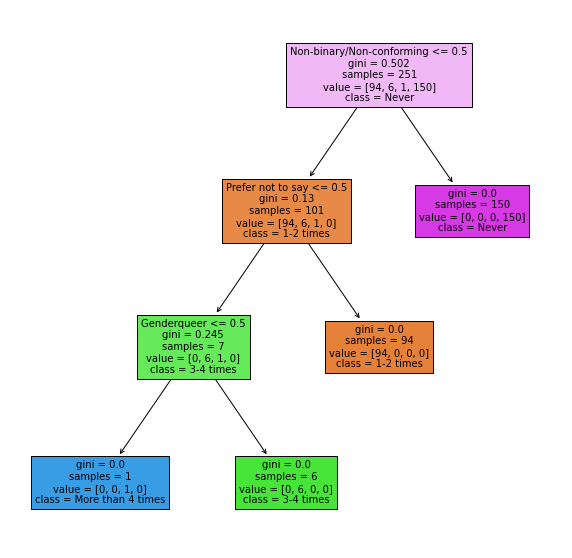

In [ ]:
clf1.fit(df2[drinkingreason],df2["Freq"])
plt.figure(figsize=(10,10))
tree.plot_tree(
    clf1,
    feature_names=clf.feature_names_in_,
    class_names=clf1.classes_,
    filled=True
);

<font color=blue> <font size=6> Section 5: inferential statistics in Drinking Frequency

<font color="brown"> <font size=3> After seeing the above graphs and machine learning, I decide to conduct a one proportion z test and create a confident interval test. 

In [ ]:
!pip install statsmodels==0.13.2
from statsmodels.stats.proportion import proportions_ztest

     |████████████████████████████████| 9.8 MB 20.7 MB/s 
     |████████████████████████████████| 233 kB 42.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<font color="brown"> <font size=3> In this test, I would to explore what the proportion of zero time drinking peer week in all UCI students
I set up the number of success equal to case of 1 to 2 time and trials of all sample, and the hypothesize value in 0.37 (the null hypothesis). This mean I assume the proportion of all UCI students who drinking 1 to 2 time would not be approximate 37 percent (Alternative hypothesis).

In [ ]:
##this show there are approximately 37 percent of stastic 7 class students drink 1 to 2 time peer weeks.
##which I want to reject this value of propotion in population.
null_value=(df2["1to2"].sum()/len(df2["1to2"])).round(3)
print(null_value)

0.375


In [ ]:
number_of_successes=df2["1to2"].sum()
number_of_trials=len(df2["1to2"])
hypothesized_proportion=null_value
z_test_statistic,pvalue=proportions_ztest(count=number_of_successes,nobs=number_of_trials,value=hypothesized_proportion)


<font color="brown"> <font size=3> In here, I have set up a significant level of 0.05

In [ ]:
z_test_statistic=z_test_statistic.round(3) 
pvalue=pvalue.round(5)
print(f"the statistic for the proportion ztest is {z_test_statistic},and the P-value is {pvalue}")
if pvalue>=0.05:
    print("the pvalue is equal and greater than 0.05 significant level,and hence fail to reject null hypothesis")
    print("Hence it shows there would likely to have 37 percent of UCI student drink 1 to 2 time per weeks")
elif pvalue<0.05:
    print("the pvalue is lower than 0.05 significant level,and hence reject null hypothesis")
    print("Hence it shows there would not likely to have 37 percent of UCI student drink 1 to 2 time per weeks")


the statistic for the proportion ztest is -0.016,and the P-value is 0.98699
the pvalue is equal and greater than 0.05 significant level,and hence fail to reject null hypothesis
Hence it shows there would likely to have 37 percent of UCI student drink 1 to 2 time per weeks


<font color="brown"> <font size=3> I also set a 95 precent confident interval fot the test in order to guess the true value within which interval in population (all UCI students)

In [ ]:
from statsmodels.stats.proportion import proportion_confint
lower,upper=proportion_confint(count=number_of_successes,nobs=number_of_trials,alpha=(1-0.95))
lower=lower.round(3)
upper=upper.round(3)

In [ ]:
print(f"we are 95% confident that the proportion for all UCI students who drink 1 to 2 times per weeks would between {lower} and {upper}")

we are 95% confident that the proportion for all UCI students who drink 1 to 2 times per weeks would between 0.315 and 0.434


<font color=blue> <font size=6> Section 6: Interesting of predicting data in other college

<font color="brown"> <font size=3> In this cases, I want to use GPA and Gender as input to predict what is the drinking level and frequency be like in Duke Univeristy 

In [ ]:
Duke=pd.read_csv("gpa.csv",na_values=" ")
Duke.dropna()

,gpa,studyweek,sleepnight,out,gender
0,3.890,50,6.0,3.0,female
1,3.900,15,6.0,1.0,female
2,3.750,15,7.0,1.0,female
3,3.600,10,6.0,4.0,male
4,4.000,25,7.0,3.0,female
5,3.150,20,7.0,3.0,male
6,3.250,15,6.0,1.0,female
7,3.925,10,8.0,3.0,female
8,3.428,12,8.0,2.0,female
9,3.800,2,8.0,4.0,male


In [ ]:

for i in Duke.gender.unique():
    Duke[i]=0
    Duke.loc[Duke["gender"]==i,i]=1

Duke.rename({"gpa":"GPA","female":"Female","male":"Male"},axis=1,inplace=True)

<font color="brown"> <font size=3> In the following code, I find out that all 55 sample in the Duke Univeristy data does not drink at all per weeks. (notice that, it might cause by the parameter of GAP, which means, Duke's students tend to have higher GPA, and so lead to more likely to have the output of never drink per week). Another major reason for casuing this because there are still some response bias data in orignal dataset, which might cause the wrong input.

In [ ]:
clf_freq=LogisticRegression()
clf.fit(df2[["Female","Male","GPA"]],df2["Freq"])
Duke["Freq"]=clf.predict(Duke[["Female","Male","GPA"]])
print(Duke["Freq"].value_counts())

Never    55
Name: Freq, dtype: int64


In [ ]:

clf_level=LogisticRegression()
clf.fit(df2[["Female","Male","GPA"]],df2["level"])
Duke["level"]=clf.predict(Duke[["Female","Male","GPA"]])
print(Duke["level"].value_counts())

Mild                     51
Moderate (tiny dizzy)     4
Name: level, dtype: int64


<font color="brown"> <font size=3>In here, since there is not comparsion between UCI and Duke drinking frequency, I decide to find out the comparision of drinking level.

In [ ]:
for i in Duke.index:
    if Duke["level"].loc[i]=="Moderate (tiny dizzy)":
        Duke["level"].loc[i]="Moderate"

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<font color="brown"> <font size=3> In conclusion, we predict that Duke University might have less Moderate drinking students and higher Mild drinking students in UCI. 


In [ ]:

for i in Duke["level"].unique():
    a=(Duke["level"]==i).sum()/len(Duke["level"])-(df2[i].sum()/len(df2[i]))
    a=(a*100).round(2)
    if a>0:
        print(f"Duke University has {a} percent higher of {i} level of drinking student than UCI")
    elif a<0:
        print(f"Duke University has {a} percent lower of {i} level drinking student than UCI")
    elif a==0:
        print(f"Duke University has the same percent of {i} level drinking student as UCI")





Duke University has 37.35 percent higher of Mild level of drinking student than UCI
Duke University has -34.56 percent lower of Moderate level drinking student than UCI


## Summary
<font color="brown"> <font size=3> Over, I ultize the alt chart and machine learning find out that, base on my survey dataset, UCI students might likely to have moderate level of drinking. They would likely to have 1 to 2 times per weeks due to more activities of socialing with peers. In general, the chi-square test tell me that there are less there are no much strong association between grade and drinking level in UCI stastic 7 class students. Meanwhile, both one proportion z-test and confident level tell me that there would likely to have 37 percent of UCI students drink 1 to 2 time per weeks. Last, by using machine learning to compare Duke Univeristy and UCI, it predict that Duke University might tend to have less drinking frequency, but higher Mild level of drinking. 

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

## References

* What is the source of your dataset(s)?
<font color=red> https://www.openintro.org/data/index.php?data=gpa. I get the extra data (Duke Univeristy's dataset) from the website: Openintro. it is provide by the researchers from this organization. 

The main dataset (Stastic Data of Project) is created by my own. 




* Were any portions of the code or ideas taken from another source?  List those sources here and say how they were used.
https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d (chi-square test: This website is a code eductional website that provide me example and skills of how to construct a chi-square table.)

https://altair-viz.github.io/altair-tutorial/notebooks/04-Compound-charts.html (interactive in altair: This website provide all guideline for me to see different interactive funciton in altair. I check them by seeing the menu on the webiste)

https://www.statology.org/one-proportion-z-test-python/ (one proportion z-test: This website teach me how to create one proportion z-test by showing me coding and relative pandas knolwedge behind it)

https://akshay-a.medium.com/confidence-interval-for-population-proportion-basic-understanding-in-python-56b8cc5f8320 (confident level: This website show me how to create a confident level test with relative confident interval. The code it provide inspire me to create my own 95 percent confident level interval test)




* List other references that you found helpful.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7fc2397b-5a45-41ec-bf27-a39ad5107d1f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>